In [1]:
import pandas as pd
!pip install pycaret &> /dev/null
from pycaret.clustering import *

In [49]:
taxi_trip = pd.read_csv("/content/Taxi Trip Fare Prediction.csv")

In [55]:
import pandas as pd
taxi_trip1 = taxi_trip.iloc[:1000, :]

# Print the first few rows of the subsetted data to verify
print(taxi_trip1.head())


   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  


In [56]:
taxi_trip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       1000 non-null   float64
 1   distance_traveled   1000 non-null   float64
 2   num_of_passengers   1000 non-null   float64
 3   fare                1000 non-null   float64
 4   tip                 1000 non-null   int64  
 5   miscellaneous_fees  1000 non-null   float64
 6   total_fare          1000 non-null   float64
 7   surge_applied       1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


## **1. Using K-Mean Clustering**
*   Evaluation Parameters for clusters =3,4,5,6
*   Elbow plot for visualization


  








**1.1 Without Preprocessing**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6035,94247.2162,0.4387,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

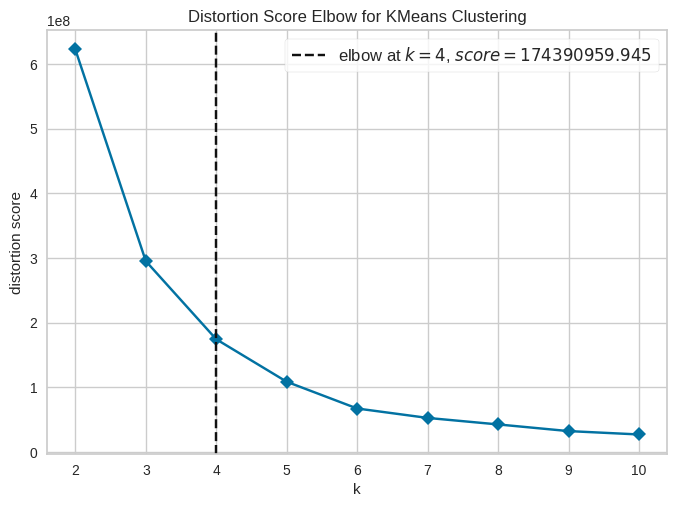

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6923,83366.0396,0.4107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6035,94247.2162,0.4387,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5815,113485.5959,0.4432,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5546,146642.4713,0.4462,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
setup(data = taxi_trip1 , verbose = False)
plot_model(create_model('kmeans'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  x= create_model('kmeans',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')


**1.2 Using z-score Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4945,429.4550,0.9209,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

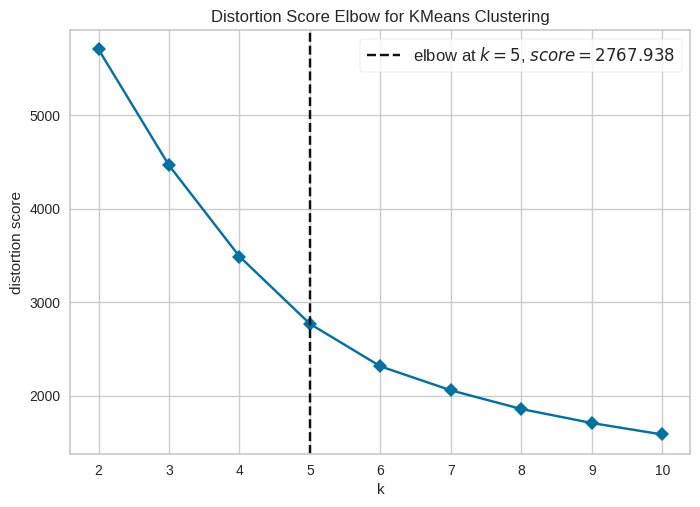

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4814,395.2659,1.1344,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4945,429.4550,0.9209,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5302,470.1966,0.8739,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5312,488.6475,0.9823,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  7


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5275,478.1586,0.9857,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [61]:
setup(data = taxi_trip1,  verbose = False , normalize=True , normalize_method='zscore')
plot_model(create_model('kmeans'), plot = 'elbow')

c= [3,4,5,6,7]
for i in c:
  print("For number of clusters = ",i)
  create_model('kmeans',num_clusters = i)
  if i == 6:
        # Plot t-SNE visualization for the clustering results with 6 clusters
        plot_model(x, plot='tsne')

**1.3 Using Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4126,1130.4537,0.8567,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

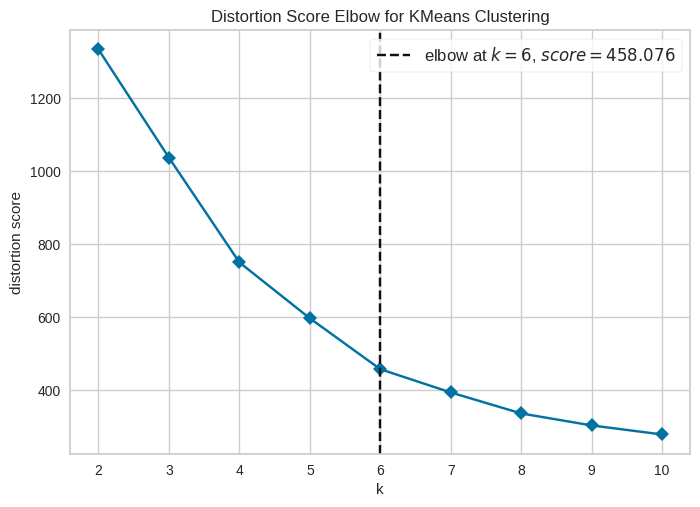

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5019,1090.1446,0.7472,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4126,1130.4537,0.8567,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4315,1127.8366,0.7759,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4380,1236.4121,0.7046,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
setup(data = taxi_trip1 ,  verbose = False , transformation=True , transformation_method='yeo-johnson')
plot_model(create_model('kmeans'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('kmeans',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**1.4 Using PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6035,94247.2162,0.4387,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

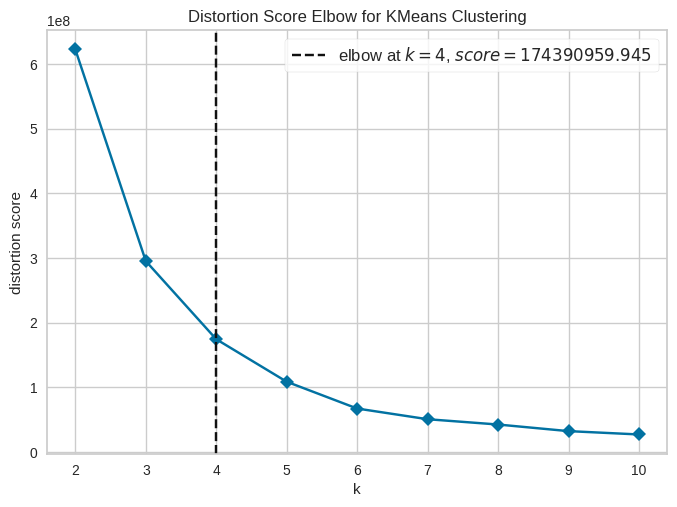

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6923,83366.0396,0.4107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6035,94247.2162,0.4387,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5815,113485.5959,0.4432,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,146844.5006,0.4424,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [63]:
setup(data = taxi_trip1, verbose=False , pca= True , pca_method='linear')
plot_model(create_model('kmeans'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('kmeans',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**1.5 Transformation + Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2481,369.2145,1.3936,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

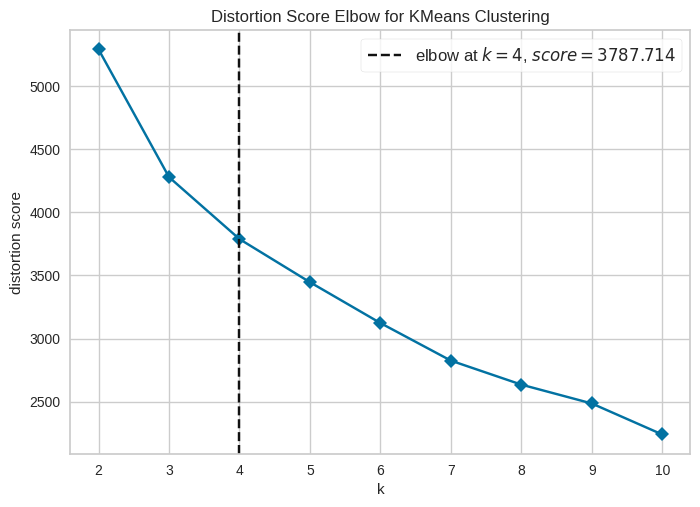

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3019,433.6776,1.3076,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2481,369.2145,1.3936,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2311,328.6918,1.4154,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2558,310.4732,1.2876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [64]:
setup(data = taxi_trip1, normalize = True , normalize_method='zscore' ,
                             transformation =True , transformation_method= 'yeo-johnson', verbose = False)
plot_model(create_model('kmeans'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('kmeans',num_clusters=i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**1.6 Transformation + Normalization + PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2485,369.1969,1.3949,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

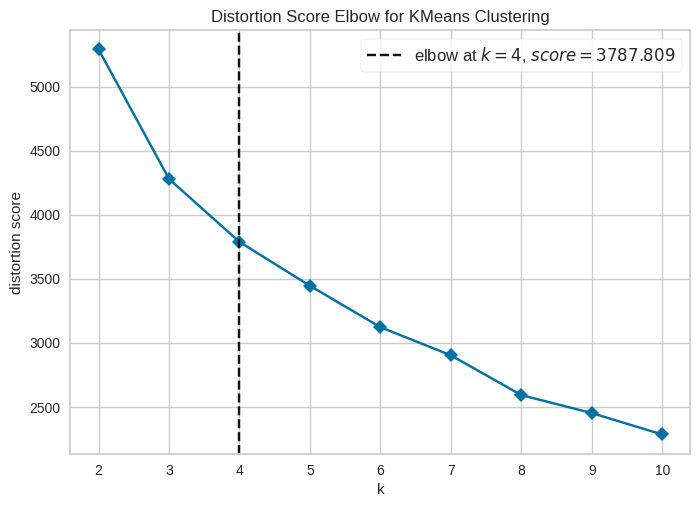

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3004,433.5298,1.3048,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2485,369.1969,1.3949,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2314,328.8581,1.4051,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2571,310.5192,1.2915,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
setup(data = taxi_trip1, transformation= True , transformation_method='yeo-johnson',
                             normalize = True , normalize_method= 'zscore',
                             pca=True , pca_method='linear' , verbose=False)
plot_model(create_model('kmeans'), plot = 'elbow')


c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('kmeans',num_clusters=i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

## **2. Using Hierarchical Clustering**
*   Evaluation Parameters for clusters =3,4,5,6
*   Elbow plot for visualization

**2.1 Without Preprocessing**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6735,84378.8115,0.3918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

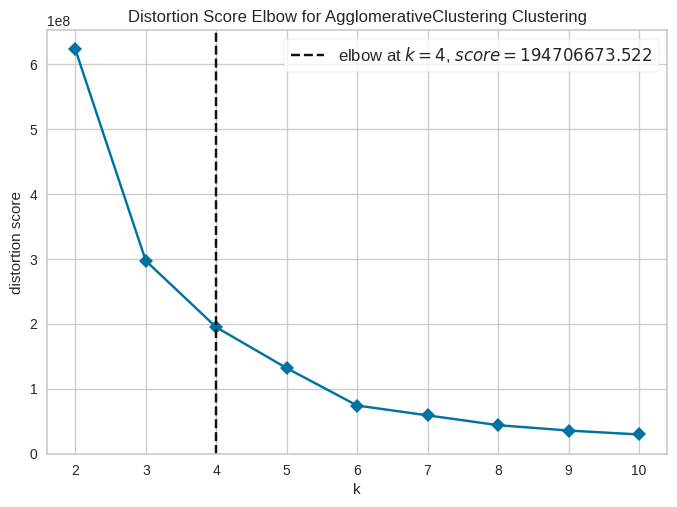

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6776,82849.8914,0.4198,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6735,84378.8115,0.3918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6020,93568.1587,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5189,133075.9861,0.4809,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [66]:
setup(data = taxi_trip1, verbose = False)
plot_model(create_model('hclust'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  x= create_model('hclust',num_clusters = i)
  if i == 5:
        # Plot t-SNE visualization for the clustering results with 5 clusters
        plot_model(x, plot='tsne')


**2.2 Using Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4773,384.0976,1.0643,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

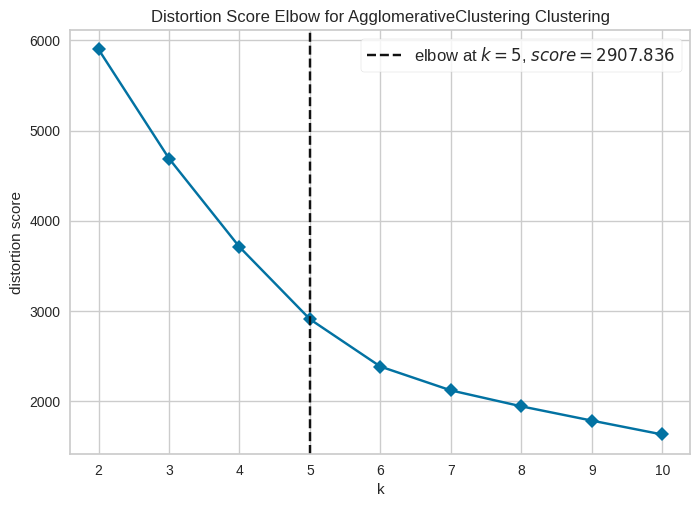

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4707,351.7916,1.3824,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4773,384.0976,1.0643,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5051,435.6078,0.8987,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5160,468.6651,0.9676,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  7


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5243,459.4701,0.9823,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [67]:
setup(data = taxi_trip1,  verbose = False , normalize=True , normalize_method='zscore')
plot_model(create_model('hclust'), plot = 'elbow')

c= [3,4,5,6,7]
for i in c:
  print("For number of clusters = ",i)
  create_model('hclust',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**2.3 Using Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4102,1042.1891,0.8629,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

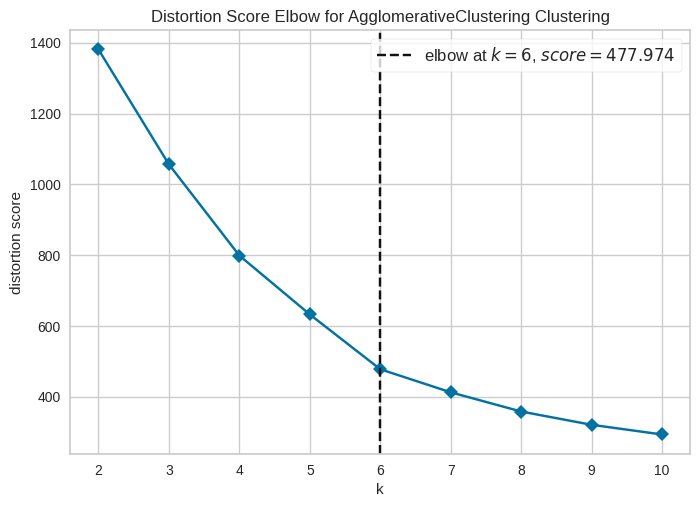

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5057,1062.2315,0.7570,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4102,1042.1891,0.8629,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4254,1051.3970,0.7735,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4296,1176.6663,0.6951,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [68]:
setup(data = taxi_trip1,  verbose = False , transformation=True , transformation_method='yeo-johnson')
plot_model(create_model('hclust'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('hclust',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**2.4 Using PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6735,84378.8115,0.3918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

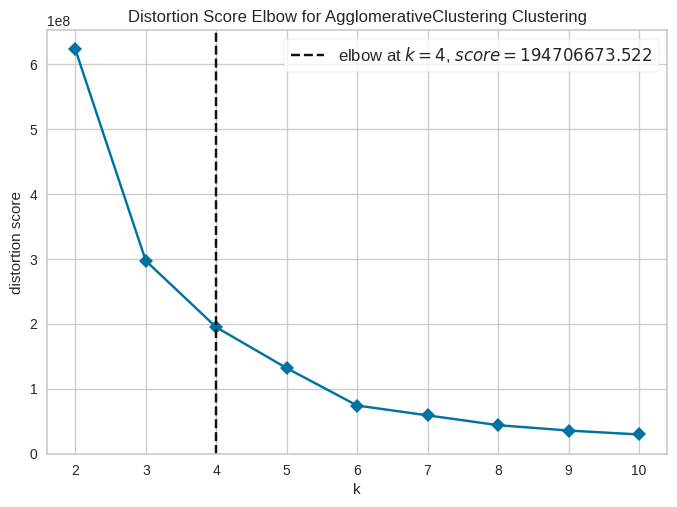

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6776,82849.8914,0.4198,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6735,84378.8115,0.3918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6020,93568.1587,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5189,133075.9861,0.4809,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [69]:
setup(data = taxi_trip1, verbose=False , pca= True , pca_method='linear')
plot_model(create_model('hclust'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('hclust',num_clusters = i)

  if i == 5:
        # Plot t-SNE visualization for the clustering results with 5 clusters
        plot_model(x, plot='tsne')

**2.5 Using Transformation + Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2417,321.9178,1.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

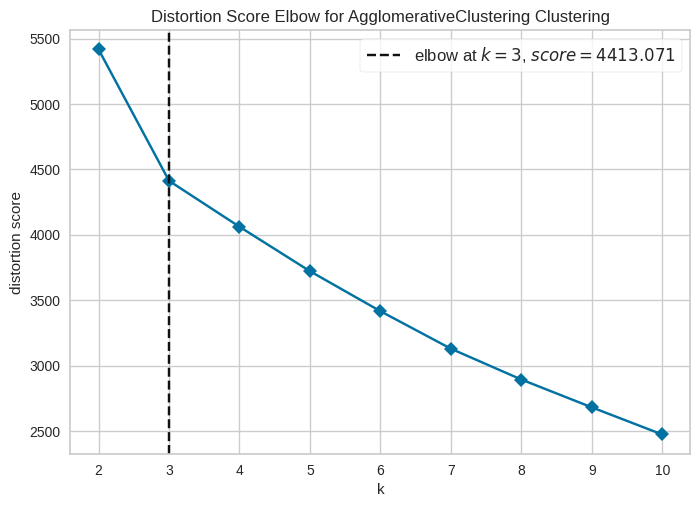

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3087,405.1790,1.3358,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2417,321.9178,1.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2198,285.9424,1.4796,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2170,266.8065,1.2747,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
setup(data = taxi_trip1, normalize = True , normalize_method='zscore' ,
                             transformation =True , transformation_method= 'yeo-johnson', verbose = False)
plot_model(create_model('hclust'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('hclust',num_clusters=i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

**2.6 Using Transformation + Normalization + PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2417,321.9178,1.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

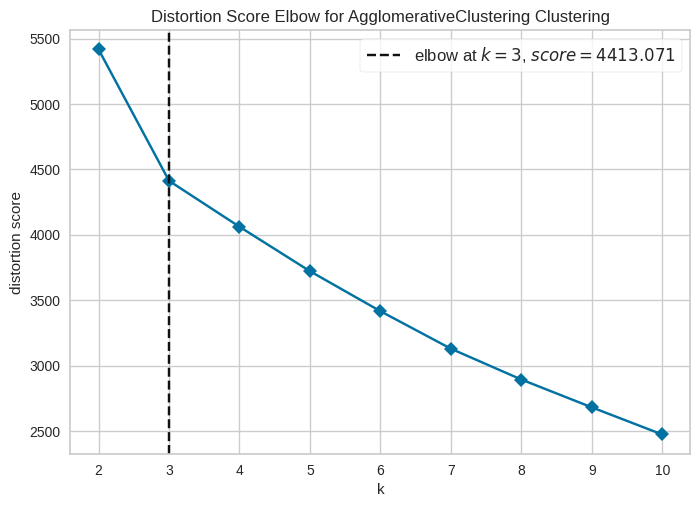

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3087,405.1790,1.3358,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2417,321.9178,1.5247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2198,285.9424,1.4796,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2170,266.8065,1.2747,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [71]:
setup(data = taxi_trip1, transformation= True , transformation_method='yeo-johnson',
                             normalize = True , normalize_method= 'zscore',
                             pca=True , pca_method='linear' , verbose=False)
plot_model(create_model('hclust'), plot = 'elbow')


c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('hclust',num_clusters=i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

## **3. Using Mean-Shift Clustering**
*   Evaluation Parameters for clusters =3,4,5,6
*   Elbow plot for visualization

**3.1 Without Preprocessing**

In [72]:
setup(data = taxi_trip1, verbose = False)
# plot_model(create_model('meanshift'), plot = 'silhouette')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  x= create_model('meanshift',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**3.2 Using Normalization**

In [73]:
setup(data = taxi_trip1 ,  verbose = False , normalize=True , normalize_method='zscore')
# plot_model(create_model('meanshift'), plot = 'elbow')

c= [3,4,5,6,7]
for i in c:
  print("For number of clusters = ",i)
  create_model('meanshift',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5214,191.6139,0.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5214,191.6139,0.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5214,191.6139,0.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5214,191.6139,0.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  7


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5214,191.6139,0.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**3.3 Using Transformation**

In [74]:
setup(data = taxi_trip1,  verbose = False , transformation=True , transformation_method='yeo-johnson')
# plot_model(create_model('meanshift'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('meanshift',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5544,399.4005,0.5601,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5544,399.4005,0.5601,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5544,399.4005,0.5601,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5544,399.4005,0.5601,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**3.4 Using PCA**

In [75]:
setup(data = taxi_trip1, verbose=False , pca= True , pca_method='linear')
# plot_model(create_model('meanshift'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('meanshift',num_clusters = i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 3 clusters
        plot_model(x, plot='tsne')

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8118,42867.1335,0.1787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**3.5 Using Transformation + Normalization**

In [76]:
setup(data = taxi_trip1, normalize = True , normalize_method='zscore' ,
                             transformation =True , transformation_method= 'yeo-johnson', verbose = False)
# plot_model(create_model('meanshift'), plot = 'elbow')

c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('meanshift',num_clusters=i)

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**3.6 Using Transformation + Normalization + PCA**

In [77]:
setup(data = taxi_trip1, transformation= True , transformation_method='yeo-johnson',
                             normalize = True , normalize_method= 'zscore',
                             pca=True , pca_method='linear' , verbose=False)
# plot_model(create_model('meanshift'), plot = 'elbow')


c= [3,4,5,6]
for i in c:
  print("For number of clusters = ",i)
  create_model('meanshift',num_clusters=i)
  if i == 3:
        # Plot t-SNE visualization for the clustering results with 5 clusters
        plot_model(x, plot='tsne')

For number of clusters =  3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For number of clusters =  6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2002,24.0070,0.9288,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]